In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git


In [ ]:
!pip install --upgrade keras

In [ ]:
%cd keras-retinanet/


In [ ]:
!python setup.py build_ext --inplace

In [ ]:
!pip install gdown
!pip install tensorflow-gpu

In [3]:
!pip3 install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image
import xml.etree.ElementTree as ET

from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [248]:
os.makedirs("snapshots", exist_ok=True)

['saisandeepkantareddy']

In [2]:
root = ET.parse('/home/autospider/Desktop/tasks/task2/dataset/annotations.xml').getroot()
anno = []
for i in os.listdir('/home/autospider/Desktop/tasks/task2/dataset/images'):
    image_name_attr = ".//image[@id='{}']".format(i.split('.')[0])
    for image_tag in root.iterfind(image_name_attr):
            image = {}
            for key, value in image_tag.items():
                image[key] = value
            image['shapes'] = []
            for box_tag in image_tag.iter('box'):
                box = {'type': 'box'}
                for key, value in box_tag.items():
                    box[key] = value
                box['points'] = "{0},{1};{2},{1};{2},{3};{0},{3}".format(
                    box['xtl'], box['ytl'], box['xbr'], box['ybr'])
                image['shapes'].append(box)
            image['shapes'].sort(key=lambda x: int(x.get('z_order', 0)))
            anno.append(image)

In [3]:
os.makedirs("snapshots", exist_ok=True)
!gdown --id 1wPgOBoSks6bTIs9RzNvZf6HWROkciS8R --output snapshots/resnet50_csv_10.h5

/bin/bash: gdown: command not found


In [5]:
# for i in df['image_name']:
#     for j in os.listdir('/home/autospider/Desktop/tasks/task2/dataset/images/'):
#         if i.split('/')[-1]==j:
#             continue
#         else:
#             print(i)

In [7]:
# for i in os.listdir('/home/autospider/Desktop/tasks/task2/dataset/images/'):
#     for j in range(len('/home/autospider/Desktop/tasks/task2/dataset/images/')):
#         if anno[j]['id']==i.split('.')[0]:
#             print(i)

In [45]:
dict={}
g=[]
for i in os.listdir('/home/autospider/Desktop/tasks/task2/dataset/images/'):
    g.append(i.split('.')[-1])

In [8]:
x_l=[]
for i in range(len(anno)):
    for j in anno[i]['shapes']:
        if j['label']=='head':
            value=(anno[i]['id']+'.jpg',round(float(j['xtl'])),round(float(j['ytl'])),round(float(j['xbr'])),round(float(j['ybr'])),"has_safety_helmet & mask")
            x_l.append(value)

In [9]:
column_name=['image_name','x_min','y_min','x_max','y_max','class_name']

In [10]:
df=pd.DataFrame(x_l, columns=column_name)

In [11]:
df['image_name']=r"/home/autospider/Desktop/tasks/task2/dataset/images/"+df['image_name'].astype(str)

In [12]:
df

,image_name,x_min,y_min,x_max,y_max,class_name
0,/home/autospider/Desktop/tasks/task2/dataset/i...,18,30,30,43,has_safety_helmet & mask
1,/home/autospider/Desktop/tasks/task2/dataset/i...,36,38,57,60,has_safety_helmet & mask
2,/home/autospider/Desktop/tasks/task2/dataset/i...,93,28,111,48,has_safety_helmet & mask
3,/home/autospider/Desktop/tasks/task2/dataset/i...,93,17,142,80,has_safety_helmet & mask
4,/home/autospider/Desktop/tasks/task2/dataset/i...,213,41,232,69,has_safety_helmet & mask
...,...,...,...,...,...,...
1787,/home/autospider/Desktop/tasks/task2/dataset/i...,151,84,162,93,has_safety_helmet & mask
1788,/home/autospider/Desktop/tasks/task2/dataset/i...,98,50,109,62,has_safety_helmet & mask
1789,/home/autospider/Desktop/tasks/task2/dataset/i...,132,88,141,97,has_safety_helmet & mask
1790,/home/autospider/Desktop/tasks/task2/dataset/i...,69,42,76,51,has_safety_helmet & mask


In [13]:
def show_image_objects(image_row):

  img_path = image_row.image_name
  box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]

  image = read_image_bgr(img_path)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  draw_box(draw, box, color=(255, 255, 0))

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

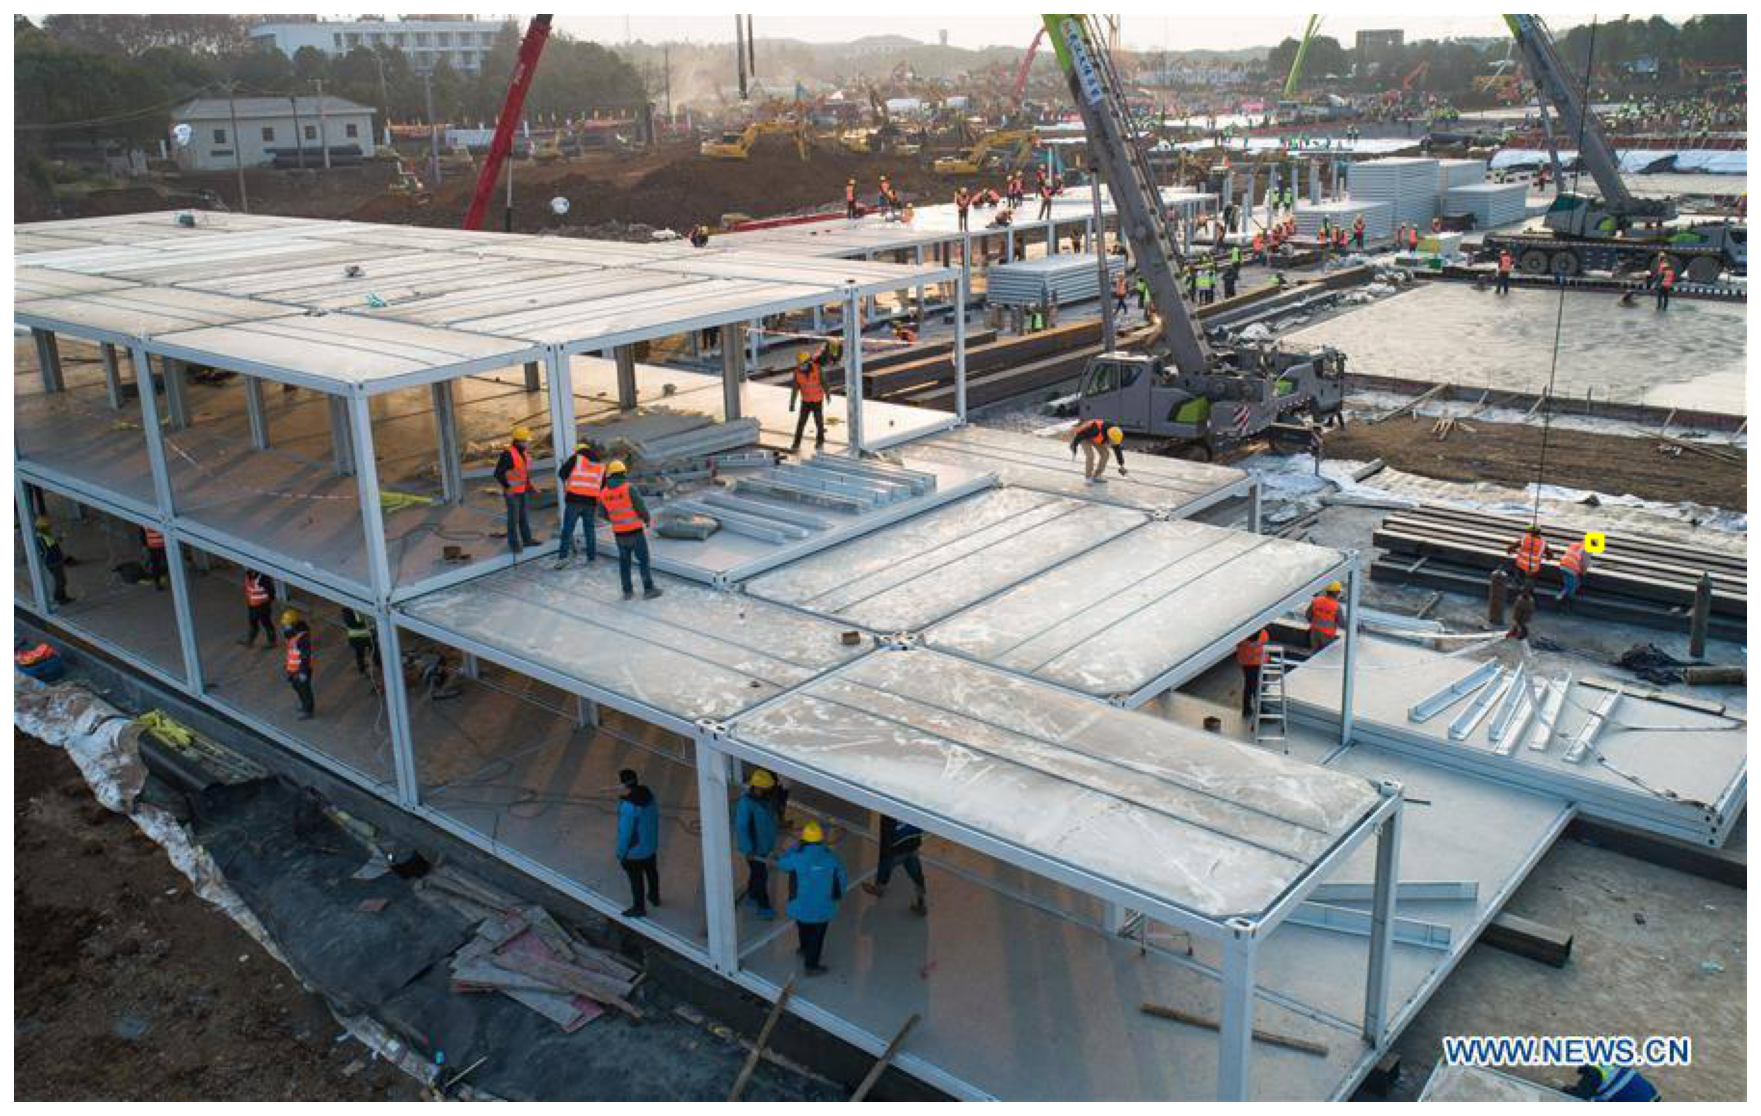

In [14]:
show_image_objects(df.iloc[59])

In [15]:
train_df, test_df = train_test_split(
  df, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [16]:
test_df.to_csv('test_images.csv', index=False, header=None)

In [21]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'

In [70]:
train_df.to_csv(ANNOTATIONS_FILE, index=False, header=None)

In [71]:
classes = set(['has_safety_helmet & mask'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [72]:
!head classes.csv

has_safety_helmet & mask,0


In [73]:
!head annotations.csv

/home/autospider/Desktop/tasks/task2/dataset/images/154.jpg,130,4,168,54,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/508.jpg,226,90,231,97,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/17.jpg,216,144,224,149,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/243.jpg,29,35,44,52,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/251.jpg,273,89,300,134,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/358.jpg,111,106,130,127,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/499.jpg,112,41,131,63,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/510.jpg,55,0,99,38,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/342.jpg,114,120,120,127,has_safety_helmet & mask
/home/autospider/Desktop/tasks/task2/dataset/images/225.jpg,117,17,197,130,has_safety_helmet & mask


In [74]:
PRETRAINED_MODEL = '/home/autospider/Desktop/tasks/snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to /home/autospider/Desktop/tasks/snapshots/_pretrained_model.h5


In [24]:
!pip3 install progressbar2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [25]:
!pip3 install keras_resnet

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [29]:
!pip3 install keras

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!retinanet-train --batch-size 2 --steps 91 --epochs 10 \
--weights logos/resnet50_coco_best_v2.1.0.h5 \
--snapshot-path logos1/snapshots \
csv annotations.csv classes.csv

2021-05-01 22:40:41.103114: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-05-01 22:40:41.103174: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Creating model, this may take a second...
2021-05-01 22:40:42.866654: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-05-01 22:40:42.866703: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2021-05-01 22:40:42.866724: I tens

Epoch 1/10
46/91 [==============>...............] - ETA: 20:44 - loss: 2.6384 - regression_loss: 1.6273 - classification_loss: 1.0111/home/autospider/.local/lib/python3.6/site-packages/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image /home/autospider/Desktop/tasks/task2/dataset/images/442.jpg with id 67 (shape (174, 290, 3)) contains the following invalid boxes: [[177.   3. 302. 125.]].
  annotations['bboxes'][invalid_indices, :]
48/91 [==============>...............] - ETA: 19:48 - loss: 2.6435 - regression_loss: 1.6346 - classification_loss: 1.0089/home/autospider/.local/lib/python3.6/site-packages/keras_retinanet/preprocessing/generator.py:181: UserWarning: Image /home/autospider/Desktop/tasks/task2/dataset/images/283.jpg with id 232 (shape (178, 283, 3)) contains the following invalid boxes: [[204.  14. 286. 114.]].
  annotations['bboxes'][invalid_indices, :]
57/91 [=================>............] - ETA: 15:29 - loss: 2.6012 - regression_loss: 1.6098 - classificat

In [18]:
!retinanet-convert-model /home/autospider/Desktop/tasks/logos1/snapshots/resnet50_csv_10.h5 output_task2.h5

2021-05-02 10:34:02.488736: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-05-02 10:34:02.488785: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2021-05-02 10:34:04.200429: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-05-02 10:34:04.200546: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2021-05-02 10:34:04.200574: I tensorflow/stream_executor/cuda/cuda_diagnosti

In [20]:
!retinanet-evaluate csv test_images.csv classes.csv output_task2.h5

2021-05-02 10:34:27.889752: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-05-02 10:34:27.889878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Loading model, this may take a second...
2021-05-02 10:34:29.956900: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-05-02 10:34:29.956959: W tensorflow/stream_executor/cuda/cuda_driver.cc:312] failed call to cuInit: UNKNOWN ERROR (303)
2021-05-02 10:34:29.956980: I tenso

In [25]:
model = models.load_model('output_task2.h5', backbone_name='resnet50')

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

In [26]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [27]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)


In [28]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [29]:
test_df.head(n=10)

,image_name,x_min,y_min,x_max,y_max,class_name
628,/home/autospider/Desktop/tasks/task2/dataset/i...,189,66,210,89,has_safety_helmet & mask
220,/home/autospider/Desktop/tasks/task2/dataset/i...,159,87,162,94,has_safety_helmet & mask
1057,/home/autospider/Desktop/tasks/task2/dataset/i...,69,29,87,52,has_safety_helmet & mask
438,/home/autospider/Desktop/tasks/task2/dataset/i...,229,58,233,63,has_safety_helmet & mask
1472,/home/autospider/Desktop/tasks/task2/dataset/i...,68,30,105,80,has_safety_helmet & mask
1611,/home/autospider/Desktop/tasks/task2/dataset/i...,39,47,44,52,has_safety_helmet & mask
722,/home/autospider/Desktop/tasks/task2/dataset/i...,187,34,248,112,has_safety_helmet & mask
701,/home/autospider/Desktop/tasks/task2/dataset/i...,129,27,171,72,has_safety_helmet & mask
1235,/home/autospider/Desktop/tasks/task2/dataset/i...,99,116,106,123,has_safety_helmet & mask
1524,/home/autospider/Desktop/tasks/task2/dataset/i...,60,0,104,44,has_safety_helmet & mask


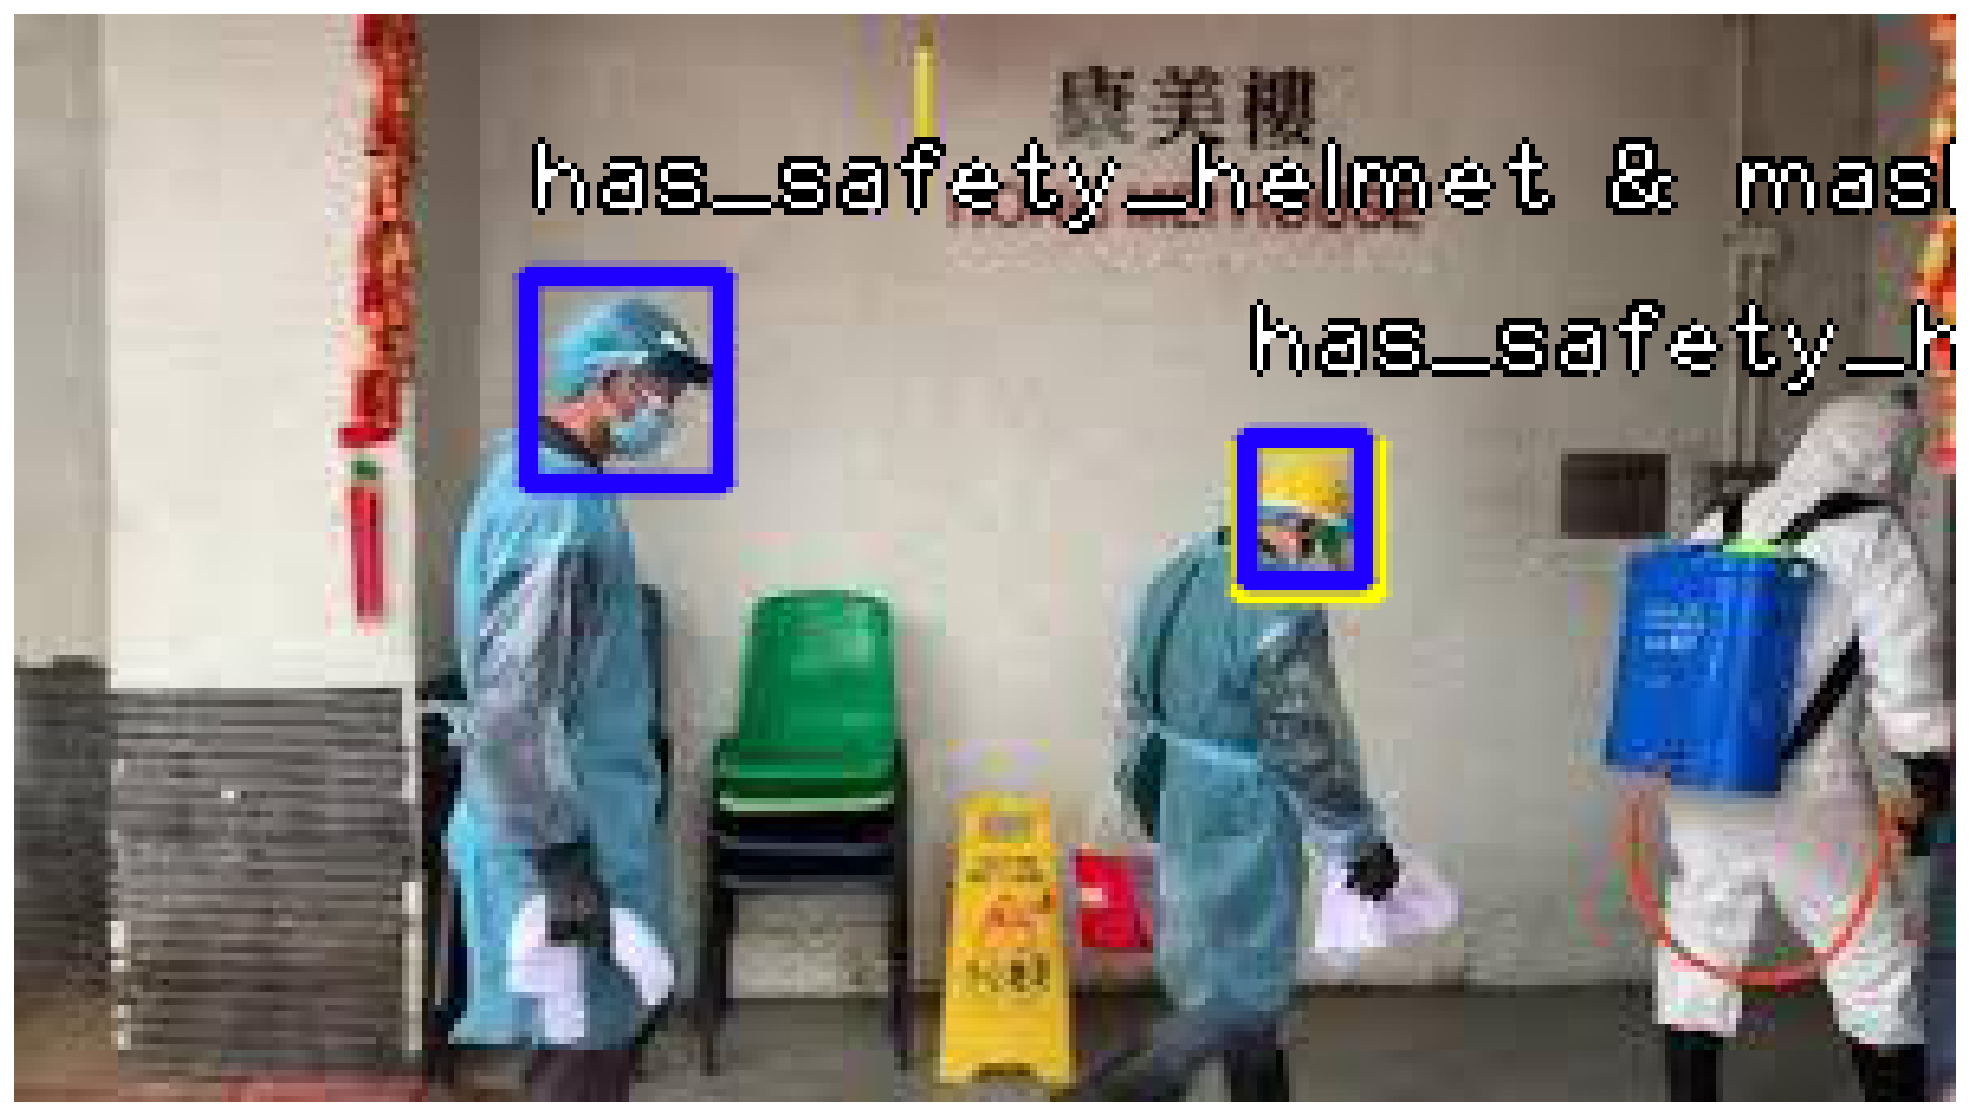

In [30]:
show_detected_objects(test_df.iloc[0])